# Challenge 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


# Scatterplot

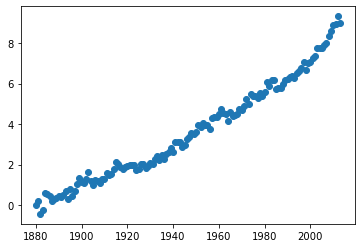

In [3]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the scatterplot
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level']) # , c='b', marker='o', label='Random Data'

# Set labels and title
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_title('Scatterplot Example')

# Add a legend
# ax.legend()

# Show the plot
plt.show()


# Lingress

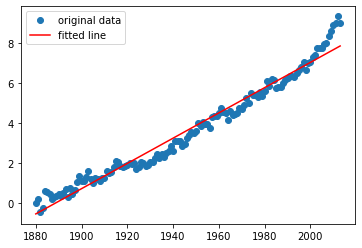

In [4]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
res = linregress(x, y) # slope, intercept, r_value, p_value, std_err

plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [5]:
new_input = 2025
predicted_value = res.slope * new_input + res.intercept
predicted_value

8.599340656833178

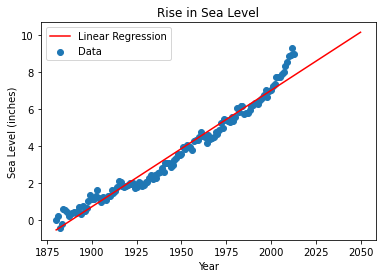

In [6]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

# Fit a linear regression model using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Make predictions for new input values
new_input = pd.Series(2050)
predicted_value = slope * new_input + intercept

# Plot the data points
plt.scatter(x, y, label='Data')

# Plot the prediction
# plt.scatter(new_input, predicted_value, label='Prediction', color='g')

x = x.append(pd.Series(range(2014,2051)))
y = y.append(pd.Series(predicted_value))

# Plot the regression line
plt.plot(x, slope * x + intercept, label='Linear Regression', color='r')

# Annotate the prediction point
# plt.annotate(f'Predicted: {predicted_value:.2f}', (new_input, predicted_value), textcoords="offset points", xytext=(10,10), ha='center')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

# Show the plot
plt.show()

In [7]:
slope * x + intercept

0     -0.542124
1     -0.479079
2     -0.416035
3     -0.352990
4     -0.289946
        ...    
32     9.923277
33     9.986322
34    10.049366
35    10.112411
36    10.175455
Length: 171, dtype: float64

# New Prediction with Data from 2000 onwards

In [8]:
df_small = (df.query('Year >= 2000')
)

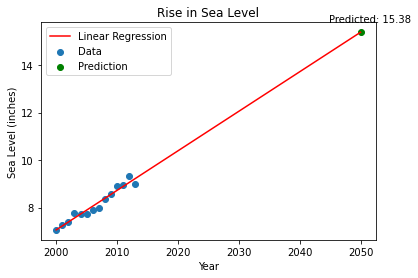

In [9]:
x_small = df_small['Year']
y_small = df_small['CSIRO Adjusted Sea Level']

# Fit a linear regression model using linregress
slope_small, intercept_small, r_value, p_value, std_err = linregress(x_small, y_small)

# Make predictions for new input values
new_input = 2050
predicted_value_small = slope_small * new_input + intercept_small

# Plot the data points
plt.scatter(x_small, y_small, label='Data')

# Plot the prediction
plt.scatter(new_input, predicted_value_small, label='Prediction', color='g')

x_small = x_small.append(pd.Series(2050))
y_small = y_small.append(pd.Series(predicted_value))

# Plot the regression line
plt.plot(x_small, slope_small * x_small + intercept_small, label='Linear Regression', color='r')

# Annotate the prediction point
plt.annotate(f'Predicted: {predicted_value_small:.2f}', (new_input, predicted_value_small), textcoords="offset points", xytext=(10,10), ha='center')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

# Show the plot
plt.show()

# Combining everything into one plot

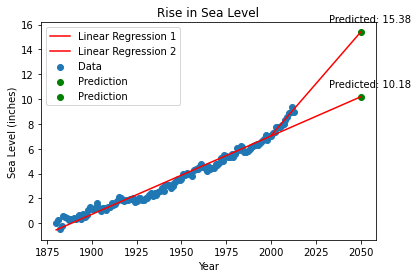

In [10]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

# Fit a linear regression model using linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Make predictions for new input values
new_input = 2050
predicted_value = slope * new_input + intercept

# Plot the data points
plt.scatter(x, y, label='Data')

# Plot the prediction
plt.scatter(new_input, predicted_value, label='Prediction', color='g')

x = x.append(pd.Series(2050))
y = y.append(pd.Series(predicted_value))

# Plot the regression line
plt.plot(x, slope * x + intercept, label='Linear Regression 1', color='r')

# ------------------------ Small


x_small = x_small.append(pd.Series(2050))
y_small = y_small.append(pd.Series(predicted_value))

# Plot the regression line
plt.plot(x_small, slope_small * x_small + intercept_small, label='Linear Regression 2', color='r')

# Plot the prediction
plt.scatter(new_input, predicted_value_small, label='Prediction', color='g')

# Annotate the prediction point
plt.annotate(f'Predicted: {predicted_value:.2f}', (new_input, predicted_value), textcoords="offset points", xytext=(10,10), ha='center')


# Annotate the prediction point
plt.annotate(f'Predicted: {predicted_value_small:.2f}', (new_input, predicted_value_small), textcoords="offset points", xytext=(10,10), ha='center')


# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

# Show the plot
plt.show()

# Code for deployment

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


def draw_plot():

  # Data
  # Read data from file
  df = pd.read_csv('epa-sea-level.csv')

  x = df['Year']
  y = df['CSIRO Adjusted Sea Level']

  df_small = (df.query('Year >= 2000'))

  x_small = df_small['Year']
  y_small = df_small['CSIRO Adjusted Sea Level']

  # Regression 1
  # Fit a linear regression model using linregress
  slope, intercept, r_value, p_value, std_err = linregress(x, y)

  # Make predictions for new input values
  new_input = pd.Series(range(2014, 2051))
  predicted_value = slope * new_input + intercept

  # Regression 2
  # Fit a linear regression model using linregress
  slope_small, intercept_small, r_value, p_value, std_err = linregress(
      x_small, y_small)

  # Make predictions for new input values
  new_input = pd.Series(range(2014, 2051))
  predicted_value_small = slope_small * new_input + intercept_small

  # Combine
  x = x._append(pd.Series(range(2014, 2051)))
  y = y._append(pd.Series(predicted_value))
  x_small = x_small._append(pd.Series(range(2014, 2051)))
  y_small = y_small._append(pd.Series(predicted_value))

  # Plot

  # Regression 1

  # Create scatter plot
  # Create a figure and axis
  fig, ax = plt.subplots()
  ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

  # Plot the regression line
  plt.plot(x, slope * x + intercept, label='Linear Regression 1', color='r')

  # Regression 2

  # Plot the regression line
  plt.plot(x_small,
           slope_small * x_small + intercept_small,
           label='Linear Regression 2',
           color='r')

  plt.xlabel('Year')
  plt.ylabel('Sea Level (inches)')
  plt.title('Rise in Sea Level')
  plt.legend()

  # Save plot and return data for testing (DO NOT MODIFY)
  plt.savefig('sea_level_plot.png')
  return plt.gca()
